## KNN (K-근접 이웃)

<br>

- 구조가 간단하고, 이해하기 쉽고, 구현하기 쉬운 편이며, 결과가 강력한 편. 오랫동안 이용된 알고리즘.
- **주변 K개의 속성을 조사, 다수결에 의해 가장 많은 투표를 얻은 클래스나 속성을 예측**.
    - 마찬가지로 **K는 주관적인 수**. 테스트를 통해 가장 좋은 수를 선택하는 것. **시행착오가 필요**.
    - 이 값에 따라 분류 결과는 달라지고, 정확도와 신뢰도 또한 달라지게 됨.
- 모든 계산이 이뤄진 후에 분류 수행. **사례기반 학습**.
- target을 주고 학습하는 **지도학습**.
- Python에선 어떻게 쓸까?
    - **KNeighborClassifier()** : 범주형을 분류하는 분류기로 사용.
    - **Regressor()** : 연속형 예측.
    - 이 둘을 합친 **KNeighborsRegressor()** 

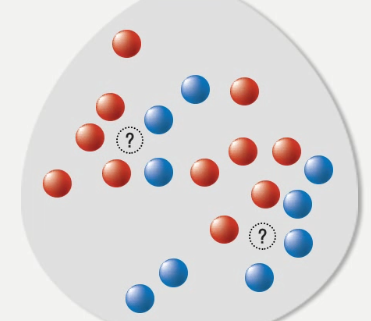

- 주머니 안에 구슬들이 있음. ?는 어떤 클래스일까?
- 속성은 1개. 색상.
- 레벨값은 2개. 빨강, 파랑
- K는 5라고 임의 지정. 
- 어떻게 진행될까?
    - ?를 기준으로 **가까운 이웃 5개**를 선택.
    - 각 그룹에서 ? 주변의 색상을 본다.
    - 빨강이 3개, 파랑이 2개. 다수결로 인해 ?는 빨강이라고 예측.
        - 하지만 여기선 각 구슬간의 거리는 고려하지 않은 상태.
    
-----------    
    
**Weighted KNN**

<br>

- 거리의 역수 or 역수의 제곱의 역수를 가중치로 두어 KNN보다 정확도가 좀 더 높음.

$$y = argmax_v\sum_{D_r}I(v = y_i)$$

- 여기서 I는 Identifier 함수.
    - 괄호 안 수식이 참이면 1, 거짓이면 0.
- $D_x$는 x를 중심으로 텍스트 제시. (x를 중심으로 원을 그리는 것) 반경집합.
- $argmax_v$는 괄호 안 수식이 최대가 되는 변수 v를 찾는 것.
- 원 안의 데이터 별로 합산해서 가장 많은 점수를 획득한 라벨 v를 구하는 수식.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

# Data Loading
like = pd.read_csv('UseData/like.csv') # 소개팅 한 자료.
like.columns = ['talk', 'book', 'travel', 'shcool', 'tall', 'skin', 'muscle', 'like_level']
like.head()

,talk,book,travel,shcool,tall,skin,muscle,like_level
0,30,80,40,40,90,90,50,1타입
1,60,50,70,50,60,60,90,2타입
2,50,40,80,60,50,70,80,2타입
3,90,50,60,30,40,20,30,3타입
4,50,70,30,70,70,80,60,1타입


In [2]:
# 학습할 데이터 X와 예측하고자 하는 타겟 데이터 Y로 분리.
x = np.array(like.drop('like_level', axis=1))
print(x.shape)
y = np.array(like.like_level)
print(y.shape)

(14, 7)
(14,)


In [3]:
print(x)
# 굳이 할 필요는 없어보이지만, 정규화 진행. 배워본다는 차원에서...
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

x = scaler.transform(x)
print(x)

[[30 80 40 40 90 90 50]
 [60 50 70 50 60 60 90]
 [50 40 80 60 50 70 80]
 [90 50 60 30 40 20 30]
 [50 70 30 70 70 80 60]
 [70 30 60 40 40 40 30]
 [40 90 60 60 60 80 60]
 [30 60 90 60 40 70 70]
 [80 40 20 80 60 40 50]
 [50 70 70 50 70 90 50]
 [80 50 60 40 50 40 70]
 [30 70 30 90 70 80 60]
 [40 60 90 60 50 70 80]
 [80 30 50 50 80 40 60]]
[[-1.26962211  1.34164079 -0.8461218  -0.98782916  2.06644812  1.29927838
  -0.59160798]
 [ 0.21160368 -0.36590203  0.57536283 -0.3592106   0.04805693 -0.09994449
   1.77482393]
 [-0.28213825 -0.93508297  1.04919104  0.26940795 -0.62474013  0.36646313
   1.18321596]
 [ 1.69282948 -0.36590203  0.10153462 -1.61644772 -1.29753719 -1.96557498
  -1.77482393]
 [-0.28213825  0.77245985 -1.31995001  0.89802651  0.720854    0.83287076
   0.        ]
 [ 0.70534562 -1.50426391  0.10153462 -0.98782916 -1.29753719 -1.03275974
  -1.77482393]
 [-0.77588018  1.91082173  0.10153462  0.26940795  0.04805693  0.83287076
   0.        ]
 [-1.26962211  0.20327891  1.52301925  0

    정규화를 진행하면, 각 차원끼리의 scale이 달라도 서로 동등한 입장이 되도록 할 수 있음.

**범주형 데이터를 이용한 KNN**

In [8]:
# KNN 모델 생성 및 훈련
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x, y)

KNeighborsClassifier(n_neighbors=3)

In [9]:
# 기존 데이터를 넣어 예측
y_pred = model.predict(x)
y_pred

array(['1타입', '2타입', '2타입', '3타입', '1타입', '3타입', '1타입', '2타입', '3타입',
       '1타입', '3타입', '1타입', '2타입', '3타입'], dtype=object)

In [30]:
print(x.shape)
# 임의의 데이터 하나를 만들어 예측해보자.
x2 = np.array([30,70,60,20,30,20,50])
print(x2.shape)
x2 = x2.reshape(1, -1)
print(x2.shape)
y_pred2 = model.predict(x2)
y_pred2

(14, 7)
(7,)
(1, 7)


array(['2타입'], dtype=object)

In [32]:
# 모델 평가 --> 기존 데이터로 예측을 해본거니 당연히 정확도는 100%이 나오는 것.
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[5 0 0]
 [0 4 0]
 [0 0 5]]
              precision    recall  f1-score   support

         1타입       1.00      1.00      1.00         5
         2타입       1.00      1.00      1.00         4
         3타입       1.00      1.00      1.00         5

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



**연속형 데이터를 이용한 KNN**

In [71]:
buy = pd.read_csv('UseData/buy.csv')
buy.columns = ['age', 'pay', 'buy_flag']
buy.head()

,age,pay,buy_flag
0,26,160,구매
1,35,210,비구매
2,26,220,비구매
3,29,260,구매
4,22,110,비구매


In [72]:
# 한글로 된 이진형 buy_flag를 0,1로 바꿔보자.
    # 미리 0으로 채워넣고, 거기서 1,0으로 바꾸기.
buy_int = np.array([0] * len(buy))
print(buy_int)
buy_int[buy.buy_flag == '구매'] = 1
buy_int[buy.buy_flag == '비구매'] = 0
print(buy_int)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0]


In [73]:
# 이렇게 하는게 더 편하지 않나?
for i in range(len(buy.buy_flag)) :
    if buy['buy_flag'][i] == '구매' :
        buy['buy_flag'][i] = 1
    else:
        buy['buy_flag'][i] = 0
print(buy.buy_flag)
test_buy = buy

0     1
1     0
2     0
3     1
4     0
5     0
6     1
7     0
8     0
9     1
10    1
11    0
12    0
13    1
14    1
15    0
16    0
17    0
18    1
19    0
Name: buy_flag, dtype: object


C:\Users\skdbs\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\skdbs\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
buy.head()

,age,pay,buy_flag
0,26,160,1
1,35,210,0
2,26,220,0
3,29,260,1
4,22,110,0


In [75]:
# 지금 보면 수 체계가 각각 다름. 
# Scaling이 필요.
scaler = StandardScaler()
scaler.fit(buy)
buy = scaler.transform(buy)
buy

array([[-0.67743894, -0.81302375,  1.22474487],
       [ 1.0161584 , -0.25994637, -0.81649658],
       [-0.67743894, -0.14933089, -0.81649658],
       [-0.11290649,  0.29313101,  1.22474487],
       [-1.43014887, -1.36610113, -0.81649658],
       [ 0.45162596, -0.25994637, -0.81649658],
       [ 1.39251337,  0.84620839,  1.22474487],
       [-1.61832635, -1.36610113, -0.81649658],
       [-0.30108397, -0.25994637, -0.81649658],
       [ 0.26344848,  0.29313101,  1.22474487],
       [ 1.20433589,  1.7311322 ,  1.22474487],
       [-1.24197138, -1.36610113, -0.81649658],
       [ 0.45162596,  1.17805482, -0.81649658],
       [-0.11290649, -0.70240827,  1.22474487],
       [ 1.39251337,  1.17805482,  1.22474487],
       [ 0.26344848,  0.07190006, -0.81649658],
       [-0.48926145, -0.03871542, -0.81649658],
       [-1.24197138, -0.25994637, -0.81649658],
       [ 1.95704582,  2.28420958,  1.22474487],
       [-0.48926145, -1.0342547 , -0.81649658]])

In [76]:
buy = pd.DataFrame(buy)
buy.columns = ['age', 'pay', 'buy_flag']
buy # 음 이렇게하는게맞는건가

,age,pay,buy_flag
0,-0.677439,-0.813024,1.224745
1,1.016158,-0.259946,-0.816497
2,-0.677439,-0.149331,-0.816497
3,-0.112906,0.293131,1.224745
4,-1.430149,-1.366101,-0.816497
5,0.451626,-0.259946,-0.816497
6,1.392513,0.846208,1.224745
7,-1.618326,-1.366101,-0.816497
8,-0.301084,-0.259946,-0.816497
9,0.263448,0.293131,1.224745


In [77]:
# 훈련시킬 X, 예측할 Y로 구분
# 낸 금액, 구매여부에 따라 나이를 예측해보는 것.
X = buy.iloc[:, [1,2]].values
Y = buy.iloc[:, 0].values

x_test = test_buy.iloc[:, [1,2]].values
y_test = test_buy.iloc[:, 0].values

print(X.shape, Y.shape)
print(x_test.shape, y_test.shape)
print(x_test)
print(y_test)

(20, 2) (20,)
(20, 2) (20,)
[[160 1]
 [210 0]
 [220 0]
 [260 1]
 [110 0]
 [210 0]
 [310 1]
 [110 0]
 [210 0]
 [260 1]
 [390 1]
 [110 0]
 [340 0]
 [170 1]
 [340 1]
 [240 0]
 [230 0]
 [210 0]
 [440 1]
 [140 0]]
[26 35 26 29 22 32 37 21 28 31 36 23 32 29 37 31 27 23 40 27]


In [78]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor() # 회귀분석이 포함된 KNN모델.
model.fit(x_test, y_test)

print('결정계수 : ', model.score(x_test, y_test))

result = model.predict(x_test)
print(result)
print(y_test)

결정계수 :  0.6857648725212465
[27.8 28.8 29.6 28.8 23.8 28.8 33.2 23.8 28.8 28.8 36.4 23.8 34.2 29.8
 34.2 28.8 29.4 28.8 36.4 23.8]
[26 35 26 29 22 32 37 21 28 31 36 23 32 29 37 31 27 23 40 27]


C:\Users\skdbs\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['gulim'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


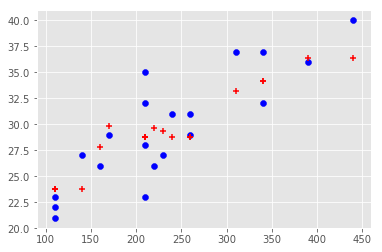

In [79]:
# 실제값과 예측한 값을 비교해보자.
plt.scatter(test_buy.pay, y_test, marker='o', c='blue')
plt.scatter(test_buy.pay, result, marker='+', c='red')
plt.show()

     Scaling은 왜한걸까... 이해가 안가네

## KNN을 이용한 Iris 분류

In [93]:
from sklearn import datasets

iris = datasets.load_iris()
dataset = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])
# 컬럼명을 바꾸자.
dataset.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Class도 다시 바꾸자.
# 'setosa' 0, 'versicolor' 1, 'virginica' 2
dataset.loc[dataset['Class']==0, 'Class'] = 'Iris-setosa'
dataset.loc[dataset['Class']==1, 'Class'] = 'Iris-versicolor'
dataset.loc[dataset['Class']==2, 'Class'] = 'Iris-virginica'

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [94]:
# 독립변수, 종속변수로 나눠보자.
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
print(x.shape, y.shape)

(150, 4) (150,)


In [95]:
# test/train set 나누자.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [96]:
# 모델 만들어 훈련시키기
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [100]:
# test해서 확인
Y_pred = model.predict(X_test)

# 혼동행렬로 한번 확인해보기
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[11  0  0]
 [ 0 11  1]
 [ 0  0  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



    정확도가 약 96%정도로 나옴.
    Iris-virginica를 잘 예측 못한걸 볼 수 있음.